In [ ]:
# Images to run models on:

# From DRIVE: 
['/dtu/datasets1/02514/DRIVE/training/images/36_training.tif',
 '/dtu/datasets1/02514/DRIVE/training/images/40_training.tif',
 '/dtu/datasets1/02514/DRIVE/training/images/37_training.tif']

# From Lesion:
['/dtu/datasets1/02514/PH2_Dataset_images/IMD410/IMD426_Dermoscopic_Image/IMD426.bmp',
 '/dtu/datasets1/02514/PH2_Dataset_images/IMD435/IMD402_Dermoscopic_Image/IMD402.bmp', 
 '/dtu/datasets1/02514/PH2_Dataset_images/IMD033/IMD022_Dermoscopic_Image/IMD022.bmp'] 


In [1]:

import os

os.getcwd()
os.chdir('/zhome/c5/f/138539/02514-Deep-Learning-In-Computer-Vision/segmentation/')

from segmentator import Segmentator
import matplotlib.pyplot as plt
import torch.nn.functional as F
import numpy as np
import torch


In [2]:
segm = Segmentator(use_wandb=False, dataset = "DRIVE", num_epochs = 3)
segm.set_seed(42)

Using device: cuda
Loading dataset: DRIVE
Loaded 13 training images
Loaded 4 test images
Loaded 3 validation images


In [3]:
data, mask = next(iter(segm.train_loader))
mask.shape

torch.Size([6, 1, 128, 128])

In [4]:
from dataloader import *


In [5]:
size = 128
batch_size = 6

dataset = DRIVE_data(train_transform_size=size, test_transform_size=size)
trainset, testset, validationset = dataset.get_datasets()



In [6]:
trainset_image_paths, testset_image_paths, validationset_image_paths = dataset.get_image_paths(trainset, testset, validationset)

In [7]:
testset_image_paths

['/dtu/datasets1/02514/DRIVE/training/images/40_training.tif',
 '/dtu/datasets1/02514/DRIVE/training/images/38_training.tif',
 '/dtu/datasets1/02514/DRIVE/training/images/37_training.tif',
 '/dtu/datasets1/02514/DRIVE/training/images/24_training.tif']

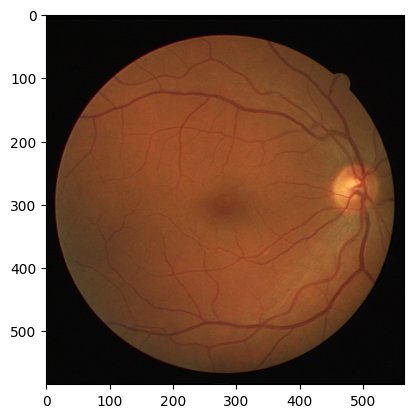

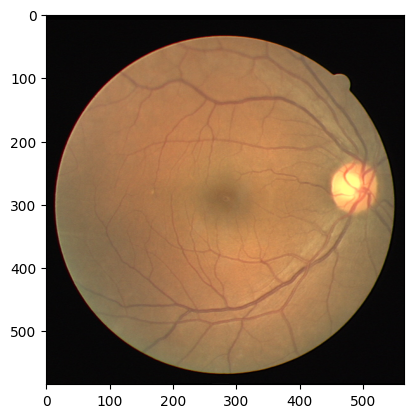

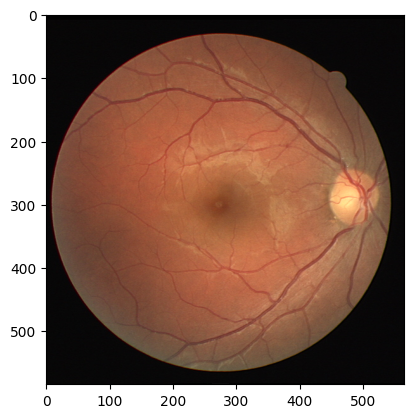

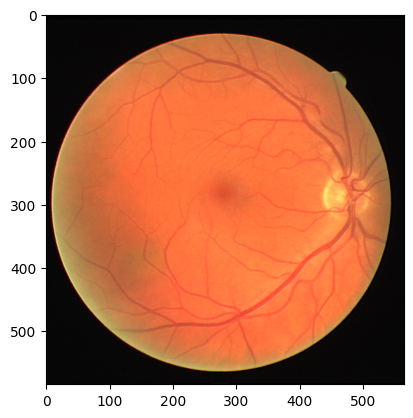

In [10]:
for img in testset_image_paths:
    image = Image.open(img)
    plt.imshow(image)
    plt.show()

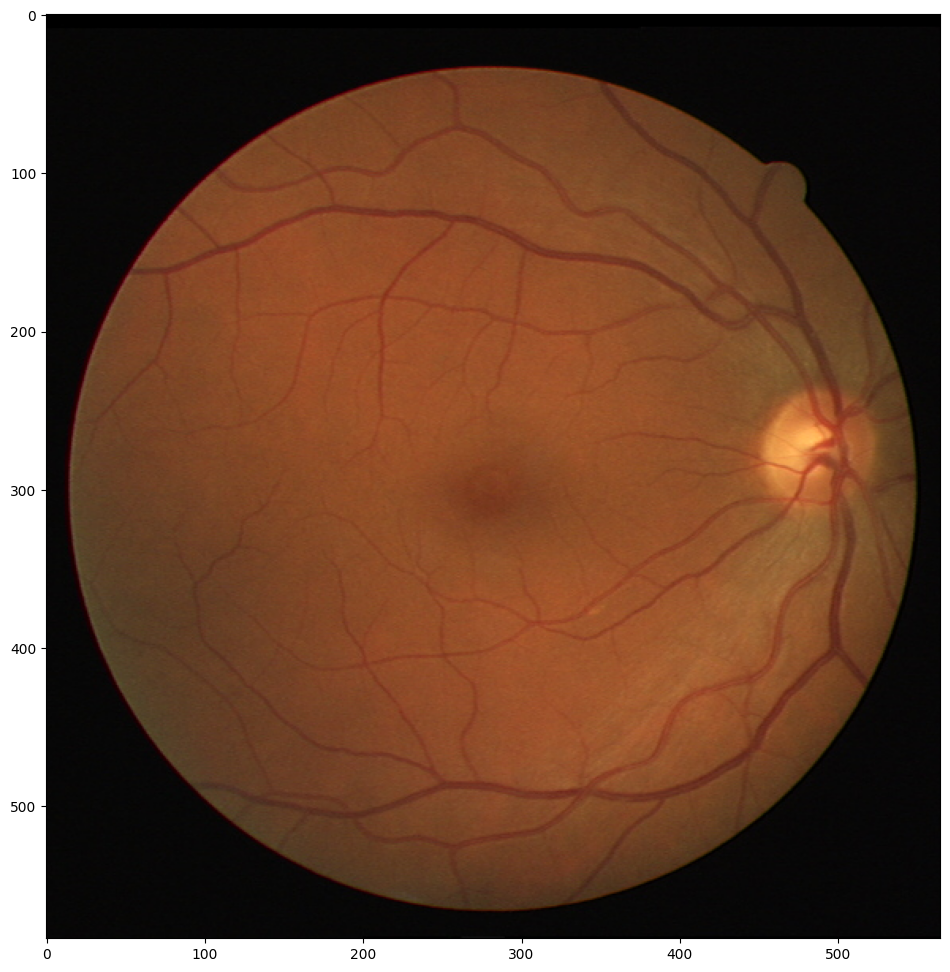

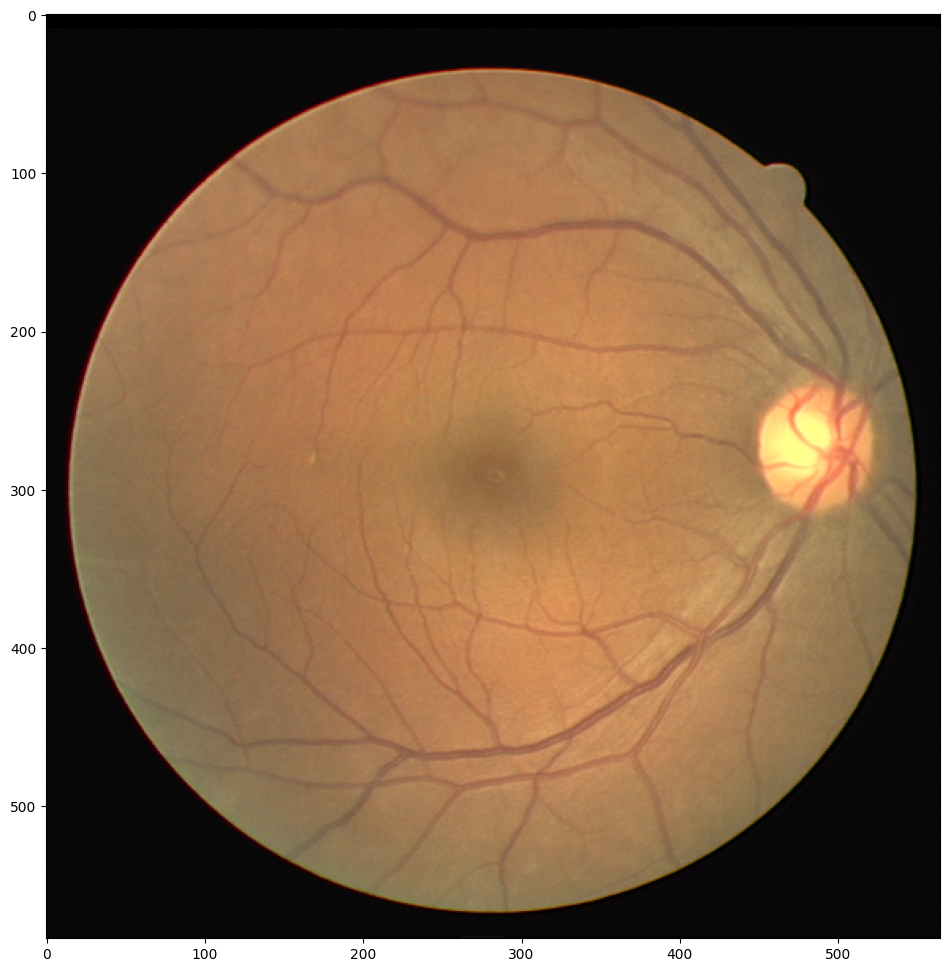

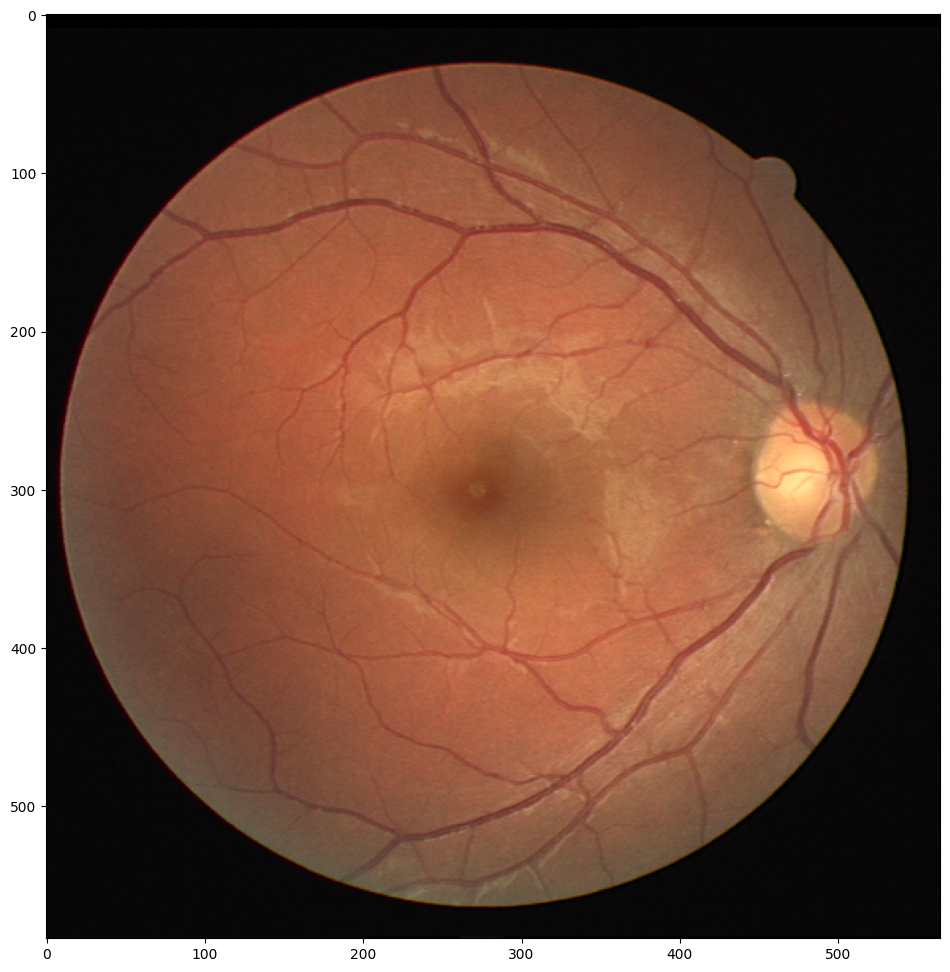

In [8]:

plt.rcParams['figure.figsize'] = [35, 12]
for i in range(5):
    # subplot = plt.subplot(2, 6, i+1+2)
    image = Image.open(testset_image_paths[i])

    plt.imshow(image)

    plt.show()


    # # subplot = plt.subplot(2, 6, i+7+2)
    # image = Image.open(testset_image_paths[i].replace('Dermoscopic_Image', 'lesion'))

    # plt.imshow(image)
    # plt.show()
